In [1]:
import pyscreenshot as ImageGrab
import os 
import time
path = "C:/Users/devro/Desktop/Jupyter/digits_new"
for i in range(0,1):
    time.sleep(5)
    im = ImageGrab.grab(bbox = (10,160,1100,400))
    print("saved.....",i)
    im.save(os.path.join(path,str(i)+'.png'))
        

    

saved..... 0


In [2]:
def new_example_preprocessing():
    import cv2
    import numpy as np
    import os
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    img = cv2.imread("C:/Users/devro/Desktop/Jupyter/digits_new/0.png")
    #cv2.imshow('img1',img)
    print("Original image shape :",img.shape)
    img = cv2.resize(img,(1200,240))
    imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #cv2.imshow('imgray',imgray)
    #cv2.imshow('img',img)
    print("New image shape :",img.shape)
    print("Gray scale image shape :",imgray.shape)
    path = "C:/Users/devro/Desktop/Jupyter/digits_new/individual"
    x_new_norm = np.zeros((5,28,28))
    x_new = np.zeros((5,28,28))
    for i in range(0,5):
        imcrop = imgray[0:300,250*i:250*(i+1)]
        #cv2.imshow('cropped', imcrop)
        imcrop = cv2.resize(imcrop,(28,28))
        #print(imcrop.shape)
        #cv2.imwrite(os.path.join(path,'temp'+str(i)+'.png'),imcrop)
        x_new[i] = np.array(imcrop)
        #x_new_norm[i] = np.array(imcrop)
        x_new_norm[i] = scaler.fit_transform(x_new[i])
        
        return x_new,x_new_norm

print(x_new_norm.shape)



NameError: name 'x_new_norm' is not defined

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_train.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)


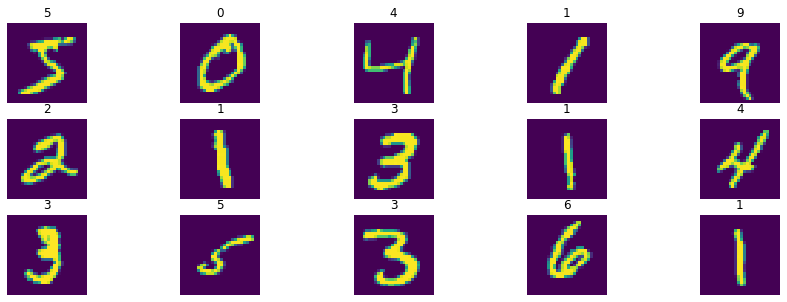

In [2]:
classes = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(15,5))
for i in range(15):
    ax = fig.add_subplot(3,5,i+1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[i])
    ax.set_title(classes[y_train[i]])
plt.show()

In [3]:
from keras.utils import to_categorical
x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

x_train_norm = x_train_reshaped/255
x_test_norm = x_test_reshaped/255
print(y_train_encoded.shape)

Using TensorFlow backend.


(60000, 10)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def make_model():
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape=(784,)))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    model.compile(
          loss = 'categorical_crossentropy',optimizer='adam',
          metrics = ['accuracy'])
    
    return model



In [5]:
model = make_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train_norm,y_train_encoded,epochs=3)
loss,accuracy = model.evaluate(x_test_norm,y_test_encoded)
print("Accuracy:{:.3f}".format(accuracy))
print("Loss:{:.3f}".format(loss))

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 19s 315us/sample - loss: 0.2009 - acc: 0.9393
Epoch 2/3
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0847 - acc: 0.9733
Epoch 3/3
10000/10000 [==============================] - 1s 79us/sample - loss: 0.0891 - acc: 0.9717
Accuracy:0.972
Loss:0.089


In [ ]:
import pyscreenshot as ImageGrab
import os 
import time
path = "C:/Users/devro/Desktop/Jupyter/digits_new"
for i in range(0,1):
    time.sleep(5)
    im = ImageGrab.grab(bbox = (10,160,1100,400))
    print("saved.....",i)
    im.save(os.path.join(path,str(i)+'.png'))
        

    

In [ ]:
import cv2
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
img = cv2.imread("C:/Users/devro/Desktop/Jupyter/digits_new/0.png")
#cv2.imshow('img1',img)
print("Original image shape :",img.shape)
img = cv2.resize(img,(1200,240))
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2.imshow('imgray',imgray)
#cv2.imshow('img',img)
print("New image shape :",img.shape)
print("Gray scale image shape :",imgray.shape)
path = "C:/Users/devro/Desktop/Jupyter/digits_new/individual"
x_new_norm = np.zeros((5,28,28))
x_new = np.zeros((5,28,28))
for i in range(0,5):
    imcrop = imgray[0:300,250*i:250*(i+1)]
    #cv2.imshow('cropped', imcrop)
    imcrop = cv2.resize(imcrop,(28,28))
    #print(imcrop.shape)
    #cv2.imwrite(os.path.join(path,'temp'+str(i)+'.png'),imcrop)
    x_new[i] = np.array(imcrop)
    #x_new_norm[i] = np.array(imcrop)
    x_new_norm[i] = scaler.fit_transform(x_new[i])
        

print(x_new_norm.shape)



In [ ]:
x_new_reshaped = np.reshape(x_new_norm,(-1,784))
preds = model.predict(x_new_reshaped)
#indices = np.random.choice(range(x_test.shape[0]),10,replace=False)
#x = x_new[indices]
#y = y_new[indices]
p = preds
fig = plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x_new[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[np.argmax(p[i])])
    print(classes[np.argmax(p[i])])
plt.show()